# AT1 – Criação e Análise do Conjunto de Dados

Este notebook contém todas as etapas para a realização da **AT1**.  

**Objetivos principais:**
- Selecionar e organizar um conjunto de dados com pelo menos **três classes de posturas**.
- Realizar análise descritiva e estatística avançada.
- Estruturar dados para uso em modelos de aprendizado de máquina.


In [2]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

ANNOTATIONS_DIR = "mpii_dataset/annotations_json"
IMAGES_DIR = "mpii_dataset/images"


In [3]:
files = [f for f in os.listdir(ANNOTATIONS_DIR) if f.endswith('.json')]
valid_count = 0
for file in files:
    with open(os.path.join(ANNOTATIONS_DIR, file), 'r') as f:
        data = json.load(f)
        if isinstance(data.get('image'), str) and isinstance(data.get('joints'), list):
            valid_count += 1
print(f"Arquivos válidos: {valid_count}/{len(files)}")


Arquivos válidos: 49978/49978


In [4]:
joint_counts = []
activity_counter = Counter()

for file in files:
    with open(os.path.join(ANNOTATIONS_DIR, file), 'r') as f:
        data = json.load(f)
        joint_counts.append(len(data.get('joints', [])))
        activity = data.get('activity')
        if activity and isinstance(activity, dict):
            act_name = activity.get('act_name')
            if act_name and act_name.strip():
                activity_counter[act_name] += 1

# Estatísticas descritivas
joint_series = pd.Series(joint_counts)
desc_stats = joint_series.describe()
print(desc_stats)


count    49978.000000
mean        17.315459
std         20.436880
min          0.000000
25%          0.000000
50%         16.000000
75%         16.000000
max        256.000000
dtype: float64


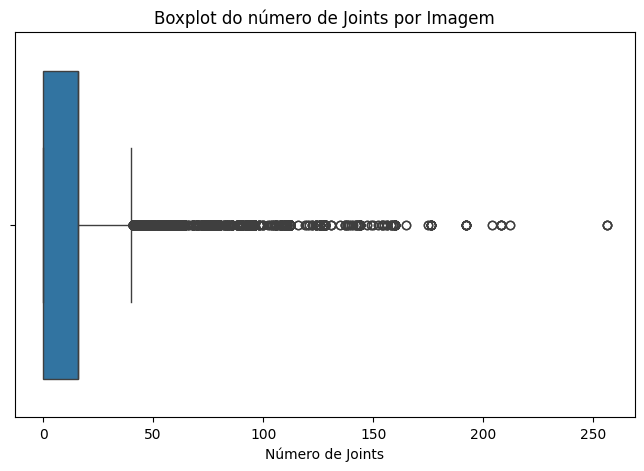

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x=joint_series)
plt.title("Boxplot do número de Joints por Imagem")
plt.xlabel("Número de Joints")
plt.savefig("mpii_dataset/boxplot_joints.png")
plt.show()


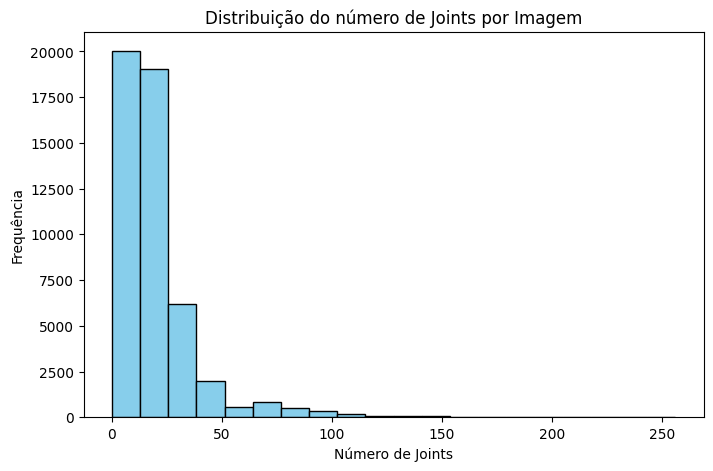

In [6]:
plt.figure(figsize=(8,5))
plt.hist(joint_counts, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição do número de Joints por Imagem")
plt.xlabel("Número de Joints")
plt.ylabel("Frequência")
plt.savefig("mpii_dataset/hist_joints.png")
plt.show()


In [7]:
if activity_counter:
    plt.figure(figsize=(10,6))
    plt.bar(activity_counter.keys(), activity_counter.values(), color='lightgreen', edgecolor='black')
    plt.xticks(rotation=90)
    plt.title("Distribuição das Atividades")
    plt.xlabel("Atividade")
    plt.ylabel("Quantidade")
    plt.tight_layout()
    plt.savefig("mpii_dataset/activity_distribution.png")
    plt.show()
else:
    print("A maioria das imagens não possui anotações de atividade.")


A maioria das imagens não possui anotações de atividade.
